In this notebook I will pre-process my data by creating one dataframe out of the republican and democratic subreddit posts. I will also tokenize my data by count vectorizing, and run some exploratory analysis and do some plotting to examine the most frequent terms from both subreddits

In [13]:
import requests
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import csv
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction import stop_words
from scipy.stats import ttest_ind

% matplotlib inline

# Reading in my data

In [14]:
republican = pd.read_csv('../Data/republican.csv')
democrat = pd.read_csv('../Data/democrat.csv')

### Setting my columns

In [15]:
democrat.columns = ['name','text','title','subreddit']
republican.columns = ['name','text','title','subreddit']

### Undersampling my democrat data in order to balance to my classes

In [16]:
republican.shape

(710, 4)

In [17]:
democrat.shape

(995, 4)

In [18]:
democrat = democrat.sample(n=710, random_state=42)

In [19]:
democrat.shape

(710, 4)

In [20]:
republican.shape

(710, 4)

### Creating one data frame from my two subreddits

In [21]:
reddit = pd.concat([republican,democrat])
reddit.fillna('', inplace=True)

In [22]:
reddit.shape

(1420, 4)

### Creating a column that contains both the title and body of the post

In [23]:
reddit['text_title'] = reddit['title'] + reddit['text']

### Saving my data frame

In [24]:
reddit.to_csv('../Data/reddit.csv')

# EDA

### Setting my X and Y

In [25]:
X = reddit['text_title']
y = list(reddit['subreddit'])

### Creating a count vectorizer data frame

In [26]:
custom_stopwords = list(stop_words.ENGLISH_STOP_WORDS)
custom_stopwords.extend(['10','000','https', 'com'])

In [27]:
cvec = CountVectorizer(stop_words = custom_stopwords, min_df = 10 , max_df = .9)

In [28]:
X_cvec = cvec.fit_transform(X)

In [29]:
term_mat = pd.DataFrame(X_cvec.toarray(), columns=cvec.get_feature_names())

In [30]:
term_mat['new_target'] = y

In [31]:
term_mat.head()

,15,2016,2018,2020,america,american,americans,amp,anti,antifa,...,woman,women,won,work,world,www,year,years,youtube,new_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### My most prevalent features for Democrats (column 0)

In [32]:
dem_words = term_mat.groupby('new_target').sum().T.sort_values(0, ascending=False)
dem_words.head(20)

new_target,0,1
trump,127,132
democrats,98,36
party,69,19
obama,54,13
democratic,52,9
just,51,19
president,50,14
clinton,47,4
hillary,46,3
vote,42,17


### Looking at a bar plot of my most prevalent words for democrats

<BarContainer object of 5 artists>

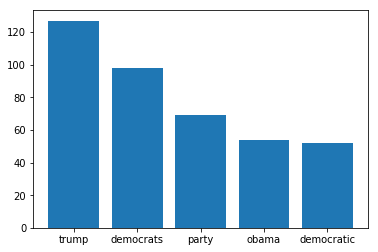

In [33]:
plt.bar(x = dem_words[0:5].index, height = dem_words[0:5][0])

### My most prevalent features for Republicans (column 1)

In [34]:
rep_words = term_mat.groupby('new_target').sum().T.sort_values(1, ascending=False)
rep_words.head(20)

new_target,0,1
trump,127,132
senate,19,40
republican,27,39
democrats,98,36
people,42,33
new,40,32
walkaway,0,28
gop,18,27
republicans,16,27
left,20,26


### Looking at a bar plot of my most prevalent words for republicans

<BarContainer object of 5 artists>

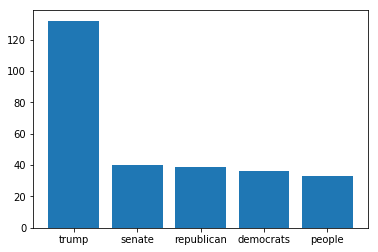

In [35]:
plt.bar(x = rep_words[0:5].index, height = rep_words[0:5][1])

In [54]:
sums = term_mat.groupby('new_target').sum().T.sort_values(0, ascending=False)[0:15]

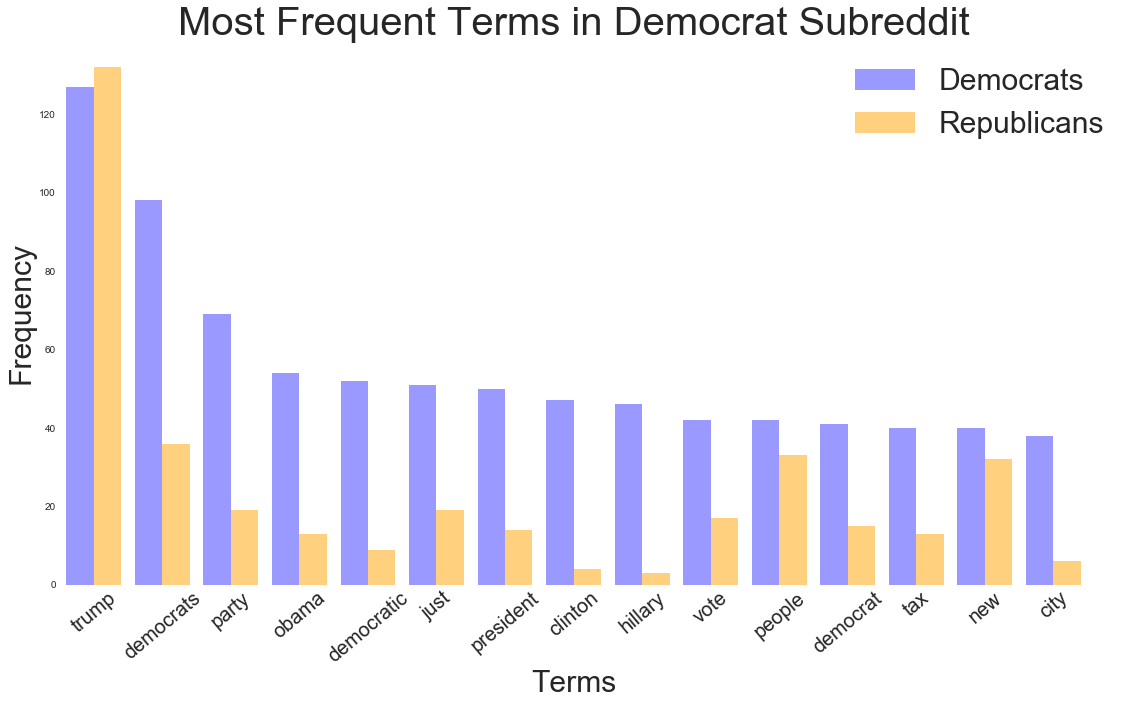

In [55]:
import matplotlib.style as style
style.use('seaborn-white')
fig, ax = plt.figure(figsize=(20,10)), plt.gca()
locs, labels = plt.xticks(fontsize=20)
plt.setp(labels, rotation=40)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_position(('data',-.5))
ax.spines['left'].set_visible(False)
plt.title("Most Frequent Terms in Democrat Subreddit", fontsize=40)
plt.xlabel("Terms", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.bar(sums.index, sums[[0]].T.values[0], align='edge', width=-.4, color = "blue", alpha = .4)
plt.bar(sums.index, sums[[1]].T.values[0], align='edge', width=.4, color = "orange", alpha  = .5)
plt.legend(['Democrats', 'Republicans'], fontsize=30)

In [56]:
sums = term_mat.groupby('new_target').sum().T.sort_values(1, ascending=False)[0:15]

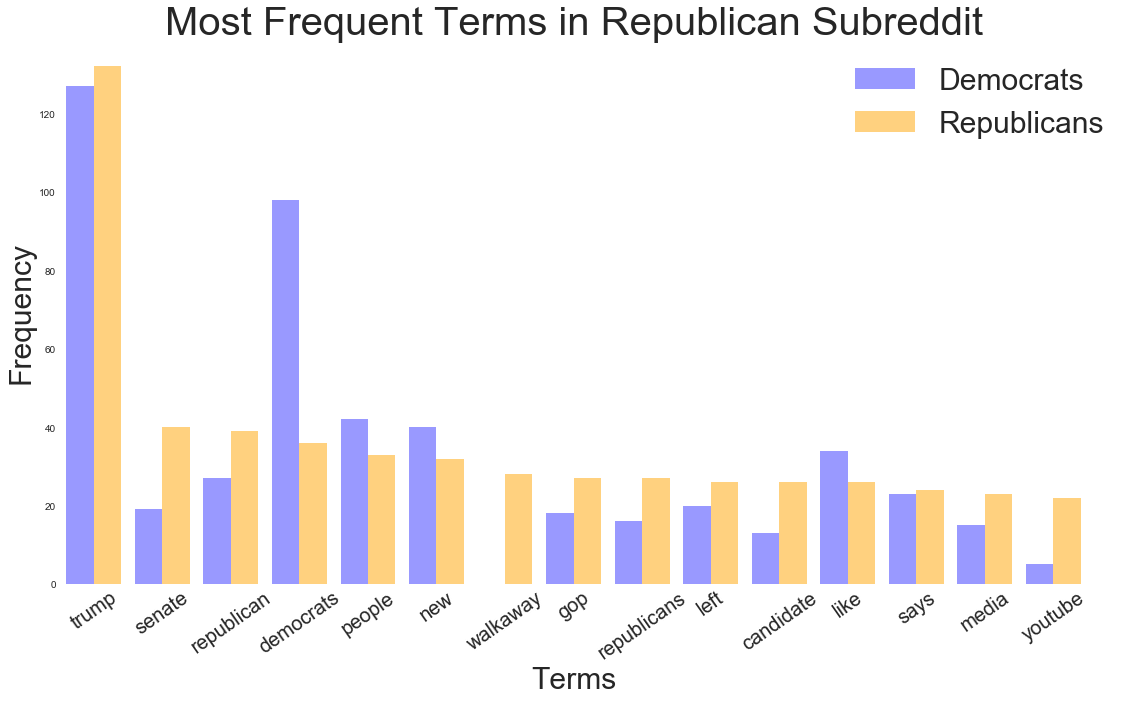

In [57]:
import matplotlib.style as style
style.use('seaborn-white')
fig, ax = plt.figure(figsize=(20,10)), plt.gca()
locs, labels = plt.xticks(fontsize=20)
plt.setp(labels, rotation=35)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_position(('data',-.5))
ax.spines['left'].set_visible(False)
plt.title("Most Frequent Terms in Republican Subreddit", fontsize=40)
plt.xlabel("Terms", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.bar(sums.index, sums[[0]].T.values[0], align='edge', width=-.4, color = "blue", alpha = .4)
plt.bar(sums.index, sums[[1]].T.values[0], align='edge', width=.4, color = "orange", alpha  = .5);
plt.legend(['Democrats', 'Republicans'], fontsize=30)

### Creating a list of top words found in both Republican and Democrat subreddits

In [40]:
top_words_dems = list(term_mat.groupby('new_target').
     mean().T.sort_values(0, ascending=False).head(20).index)

top_words_reps = list(term_mat.groupby('new_target').
     mean().T.sort_values(1, ascending=False).head(20).index)

In [41]:
top_words_overlap = [word for word in top_words_dems if word in top_words_reps]

And we could conduct a hypothesis test on this.

$H_0$: The subreddits for democrats and republicans have the same mean frequency for word $x$.

$H_A$: The subreddits for democrats and republicans have a different mean frequency for word $x$.

We'll set our alpha at .05

In [42]:
ttest_dict = {}
for word in top_words_overlap:
    ttest_dict[word] = ttest_ind(term_mat[term_mat['new_target']==1][word], 
         term_mat[term_mat['new_target']==0][word])

In [43]:
ttest_dict

{'trump': Ttest_indResult(statistic=0.30883536713950027, pvalue=0.7574921315500336),
 'democrats': Ttest_indResult(statistic=-3.897874008501596, pvalue=0.00010157088724990421),
 'party': Ttest_indResult(statistic=-3.580017685835992, pvalue=0.0003551616996780488),
 'just': Ttest_indResult(statistic=-3.0513150412538232, pvalue=0.0023207191509473967),
 'people': Ttest_indResult(statistic=-0.8044763032257315, pvalue=0.4212568023672676),
 'new': Ttest_indResult(statistic=-0.87068138445843, pvalue=0.3840755185635284),
 'like': Ttest_indResult(statistic=-0.8649776038207364, pvalue=0.3871973870436237)}

In [44]:
def plot_cvec_dist(words, dataframe, target = 'new_target', classes = [0,1]):
    nrows = len(words)//2 if not len(words)%2 else len(words)//2 + 1
    class_0 = dataframe[dataframe[target]==classes[0]]
    class_1 = dataframe[dataframe[target]==classes[1]]
    fig, ax = plt.subplots(ncols=2, nrows=nrows, figsize=(20, 7*nrows))
    ax = ax.ravel()
    
    for i, word in enumerate(words):
        counts_0 = class_0[word].value_counts().to_dict()
        counts_1 = class_1[word].value_counts().to_dict()
        mean_0 = class_0[word].mean()
        mean_1 = class_1[word].mean()
        ax[i].bar(counts_0.keys(), counts_0.values(), color='goldenrod', alpha=.3, align='edge', width=-.3)
        ax[i].bar(counts_1.keys(), counts_1.values(), color='grey', alpha=.3, align='edge', width=.3)
        ymin, ymax = ax[i].get_ylim()
        ax[i].plot([mean_0]*2, [ymin, ymax], ':', color='goldenrod')
        ax[i].plot([mean_1]*2, [ymin, ymax], ':', color='grey')
        ax[i].set_title(f'{word} frequency counts\nmeans: {mean_0:0.03f} vs {mean_1:0.03f}')
        ax[i].legend(classes)

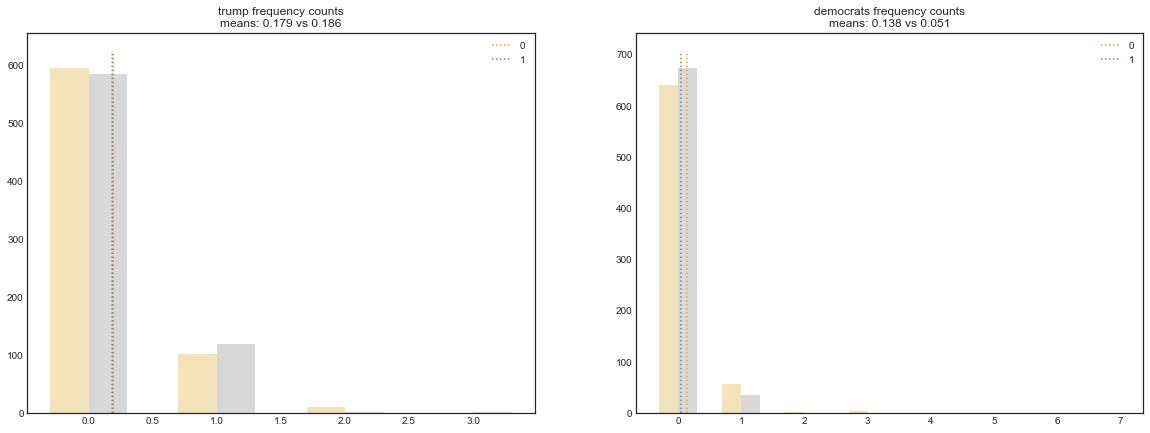

In [45]:
plot_cvec_dist(['trump','democrats'], term_mat)

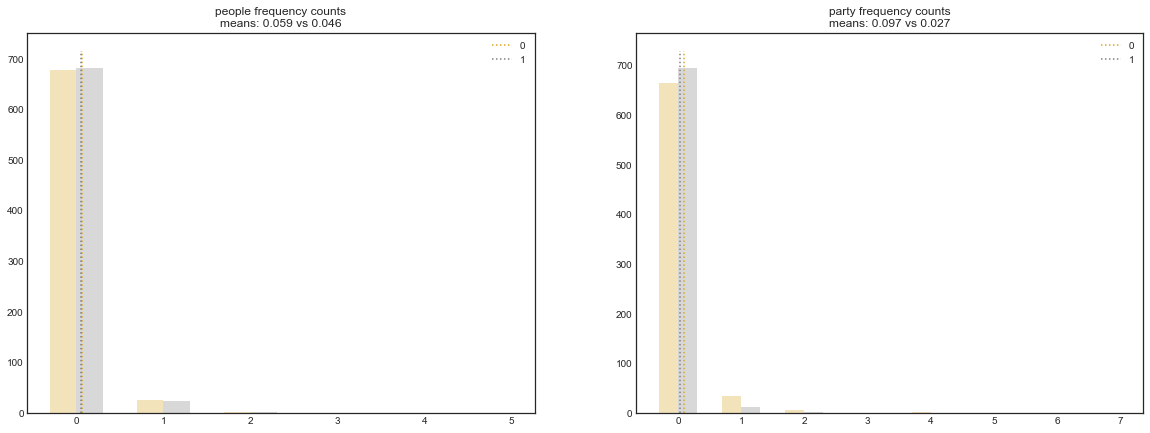

In [46]:
plot_cvec_dist(['people','party'], term_mat)

<BarContainer object of 4 artists>

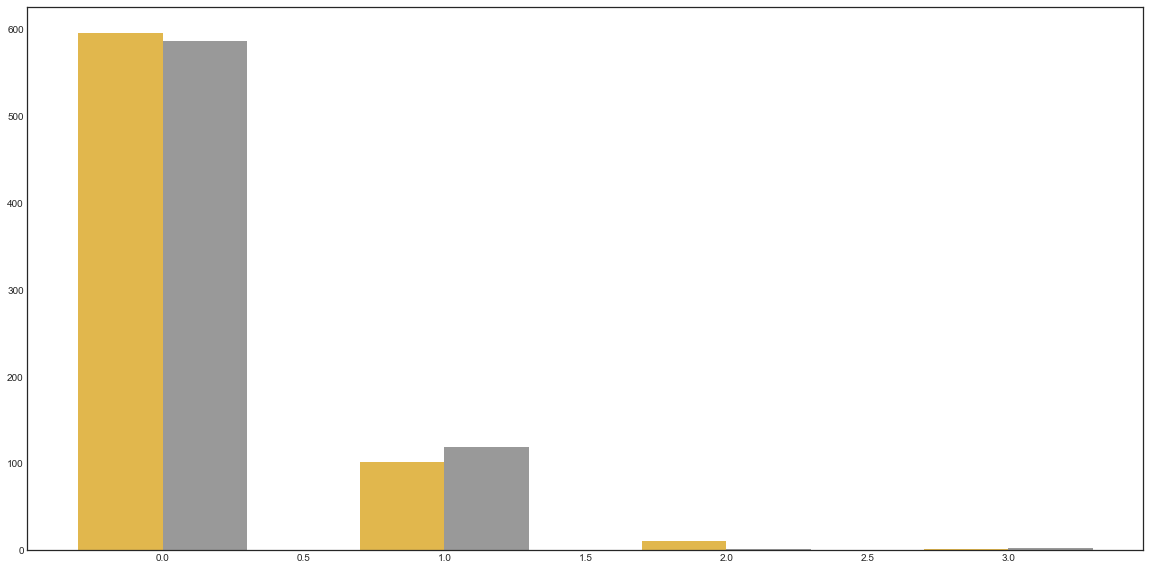

In [47]:
counts_0 = term_mat[term_mat['new_target']==0]['trump'].value_counts().to_dict()
counts_1 = term_mat[term_mat['new_target']==1]['trump'].value_counts().to_dict()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(counts_0.keys(), counts_0.values(), color='goldenrod', alpha=.8, align='edge', width=-.3)
plt.bar(counts_1.keys(), counts_1.values(), color='grey', alpha=.8, align='edge', width=.3)

### Train test split and save

In [48]:
y = reddit['subreddit']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

In [50]:
X_train.to_csv('../Data/X_train.csv')

In [51]:
X_test.to_csv('../Data/X_test.csv')

In [52]:
y_train.to_csv('../Data/y_train.csv')

In [53]:
y_test.to_csv('../Data/y_test.csv')